In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/Real estate.csv')

## Shape of the dataset

In [ ]:
print("The dataset has", df.shape[1], "columns and", df.shape[0], "rows.")

The dataset has 8 columns and 414 rows.


## Information about the dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Last 5 rows of the dataset

In [ ]:
df.tail()

No  X1 transaction date  ...  X6 longitude  Y house price of unit area
409  410             2013.000  ...     121.50381                        15.4
410  411             2012.667  ...     121.54310                        50.0
411  412             2013.250  ...     121.53986                        40.6
412  413             2013.000  ...     121.54067                        52.5
413  414             2013.500  ...     121.54310                        63.9

[5 rows x 8 columns]

## Splitting the dataset into train, validation and test sets (70-15-15)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("Y house price of unit area", axis=1)
Y = df["Y house price of unit area"]
x_train, x_val_test, y_train, y_val_test = train_test_split(X, Y, random_state = 42, test_size = 0.30)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, random_state = 42, test_size = 0.50)

## Predicting the price label using Linear Regression with different polynomial degrees

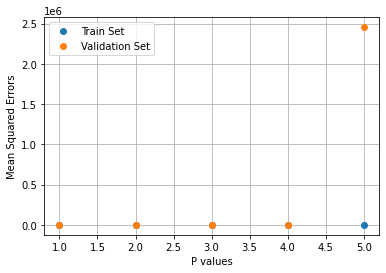

p: 1  train error: 78.74157321401073  validation error: 96.697333002955
p: 2  train error: 54.02558267015638  validation error: 82.64438936048745
p: 3  train error: 43.006794575423065  validation error: 106.6931463855064
p: 4  train error: 18.796222958152843  validation error: 584.1162762389348
p: 5  train error: 1.9923049118612808  validation error: 2453613.5320499744


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

t_list = []
v_list = []

for p in range(1,6):
  poly_reg = PolynomialFeatures(degree = p)
  x_poly_train = poly_reg.fit_transform(x_train)
  lin_reg = LinearRegression()
  lin_reg.fit(x_poly_train, y_train)
  y_pred_train = lin_reg.predict(x_poly_train)
  t_list.append(mean_squared_error(y_train, y_pred_train))

  x_poly_val = poly_reg.fit_transform(x_val)
  y_pred_val = lin_reg.predict(x_poly_val)
  v_list.append(mean_squared_error(y_val, y_pred_val))


plt.plot(range(1, 6), t_list, 'o', label = "Train Set")
plt.plot(range(1, 6), v_list, 'o', label = "Validation Set")
plt.legend()
plt.xlabel("P values")
plt.ylabel("Mean Squared Errors")
plt.grid()
plt.show()


for i in range(5):
  print("p:", i+1, " train error:", t_list[i], " validation error:", v_list[i])


## Covariance Matrix of the Dataset

In [17]:
df.cov()

No  ...  Y house price of unit area
No                                      14317.500000  ...                  -46.542615
X1 transaction date                        -1.641671  ...                    0.335665
X2 house age                              -44.723245  ...                  -32.640356
X3 distance to the nearest MRT station  -2049.850694  ...               -11567.871845
X4 number of convenience stores            -4.475787  ...                   22.885163
X5 latitude                                -0.015012  ...                    0.092249
X6 longitude                               -0.020309  ...                    0.109273
Y house price of unit area                -46.542615  ...                  185.136507

[8 rows x 8 columns]

## Correlation Map of the database

In [19]:
df.corr()

No  ...  Y house price of unit area
No                                      1.000000  ...                   -0.028587
X1 transaction date                    -0.048658  ...                    0.087491
X2 house age                           -0.032808  ...                   -0.210567
X3 distance to the nearest MRT station -0.013573  ...                   -0.673613
X4 number of convenience stores        -0.012699  ...                    0.571005
X5 latitude                            -0.010110  ...                    0.546307
X6 longitude                           -0.011059  ...                    0.523287
Y house price of unit area             -0.028587  ...                    1.000000

[8 rows x 8 columns]

## Visualized version of the correlation map

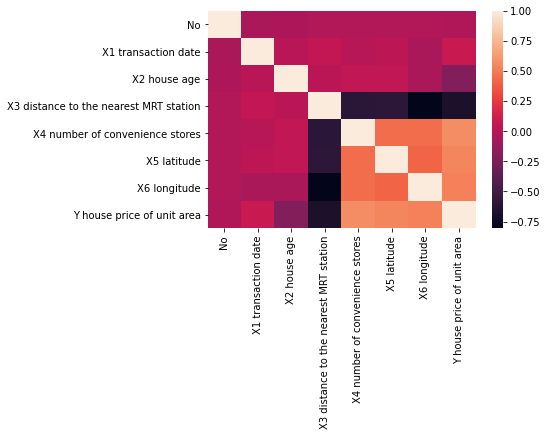

In [18]:
import seaborn as sns
sns.heatmap(df.corr())

Based on the correlation map, the least covariated features with Y house price of unit area are No, X1 transaction date, X3 distance to the nearest MRT station and X6 longitude.

## Predicting the house price label using Linear Regression by discarding some of the features which are not correlated with the price label

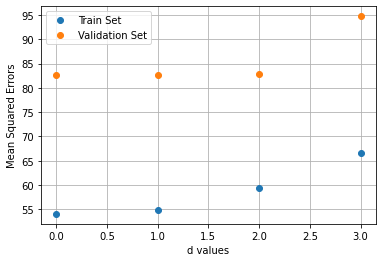

d: 0  train error: 54.02558267015638  validation error: 82.64438936048745
d: 1  train error: 54.77465299181273  validation error: 82.72544946351766
d: 2  train error: 59.409083424088585  validation error: 82.82076059505013
d: 3  train error: 66.52152223798922  validation error: 94.77122880855971


In [25]:
l = ["No", "X1 transaction date", "X3 distance to the nearest MRT station", "X6 longitude"]
errors_t = []
errors_v = []

for i in range(4):
  df.drop(l[:i], axis = 1)
  poly_reg = PolynomialFeatures(degree = 2)
  x_poly_train = poly_reg.fit_transform(x_train.drop(l[:i], axis = 1))
  lin_reg = LinearRegression()
  lin_reg.fit(x_poly_train, y_train)
  y_pred_train = lin_reg.predict(x_poly_train)
  errors_t.append(mean_squared_error(y_train, y_pred_train))

  x_poly_val = poly_reg.fit_transform(x_val.drop(l[:i], axis = 1))
  y_pred_val = lin_reg.predict(x_poly_val)
  errors_v.append(mean_squared_error(y_val, y_pred_val))

plt.plot(range(4), errors_t, 'o', label = "Train Set")
plt.plot(range(4), errors_v, 'o', label = "Validation Set")
plt.legend()
plt.xlabel("d values")
plt.ylabel("Mean Squared Errors")
plt.grid()
plt.show()


for i in range(4):
  print("d:", i, " train error:", errors_t[i], " validation error:", errors_v[i])

##Report

The goal of this assignment is to predict the house price of unit area given some features such as transaction date, age of the house and distance to the nearest sitation by using linear regression.

The dataset has 8 columns and 414 rows. Columns are composed of numerical data types as 2 integers and 6 floats.

The dataset does not contain any missing values so preprocessing is not needed.

The dataset has been splitted to three parts as train, validation and test sets with the proportions of 70, 15, 15 respectively.

The linear regression model has been used since the price is a continuous value. Polynomial degrees as hyperparameters of [1, 2, 3, 4, 5] have been tested and the minimum mean squared error on validation has been taken with p = 2. Then, based on the correlation map, the features that have less effect on the price label (the ones which are close to 0) have been discarded in order. The minimum mean squared error has been taken with the hyperparameter d = 0. This means that the columns should not be discarded.

The first linear regression algoritm with the polynomial degree test lasted 2.548 seconds. On the other hand, second linear regression model with different number of discarded features lasted 1.502 seconds. One of the interesting things to me was the validation error when the polynomial degree was p = 5.
